In [1]:
!pip install scikit-learn pandas


In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle


In [5]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
labels = iris.target_names


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = model.predict(X_test)

In [9]:
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=labels))

📊 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



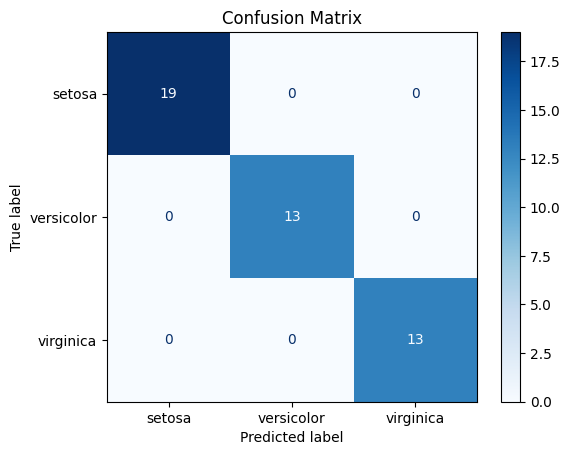

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


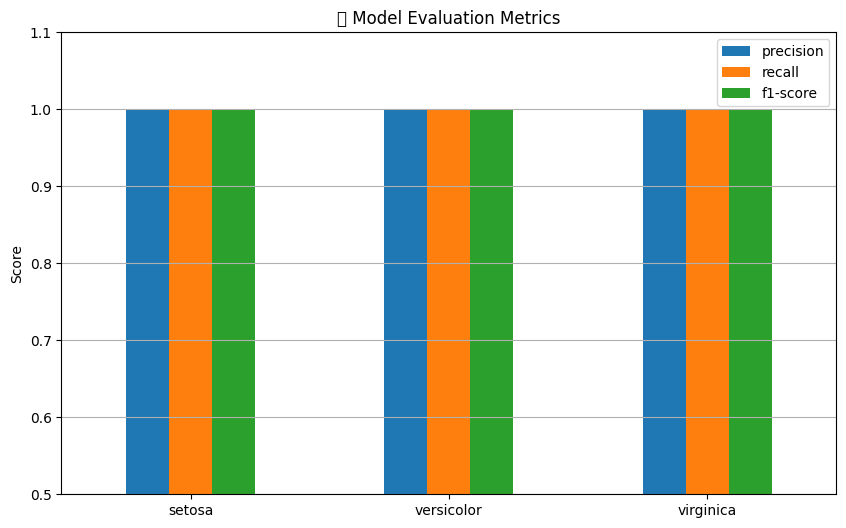

In [11]:
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.drop(['accuracy', 'macro avg', 'weighted avg'])

metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), ylim=(0.5, 1.1))
plt.title("📈 Model Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [12]:
with open("iris_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [13]:
import pickle


with open("iris_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [14]:
from google.colab import files
files.download("iris_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>